In [1]:
'''
    Author
    @ Raza Imam
'''

'''
    Building a neural network using functional API to predict Net hourly electrical energy output (PE) and Exhaust Vacuum (V) with Temperature (T), 
    Ambient Pressure (AP) and Relative Humidity (RH) as inputs
'''

'\n    Building a neural network using functional API to predict Net hourly electrical energy output (PE) and Exhaust Vacuum (V) with Temperature (T), \n    Ambient Pressure (AP) and Relative Humidity (RH) as inputs\n'

In [2]:
# Libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [8]:
# Dataset
# !pip install xlrd
# !pip install openpyxl
df = pd.read_excel('Dataset/CCPP/Folds5x2_pp.xlsx')
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [9]:
# Fetch Output
def get_outputs(data):
    y1 = np.array(data.pop('PE'))
    y2 = np.array(data.pop('V'))
    return y1, y2

In [10]:
# Data splitting
train, test = train_test_split(df, test_size=0.2, random_state=0)
y_train, y_test = get_outputs(train), get_outputs(test)
X_train, X_test = MinMaxScaler().fit_transform(train), MinMaxScaler().fit_transform(test)

## Implemented Functional Model
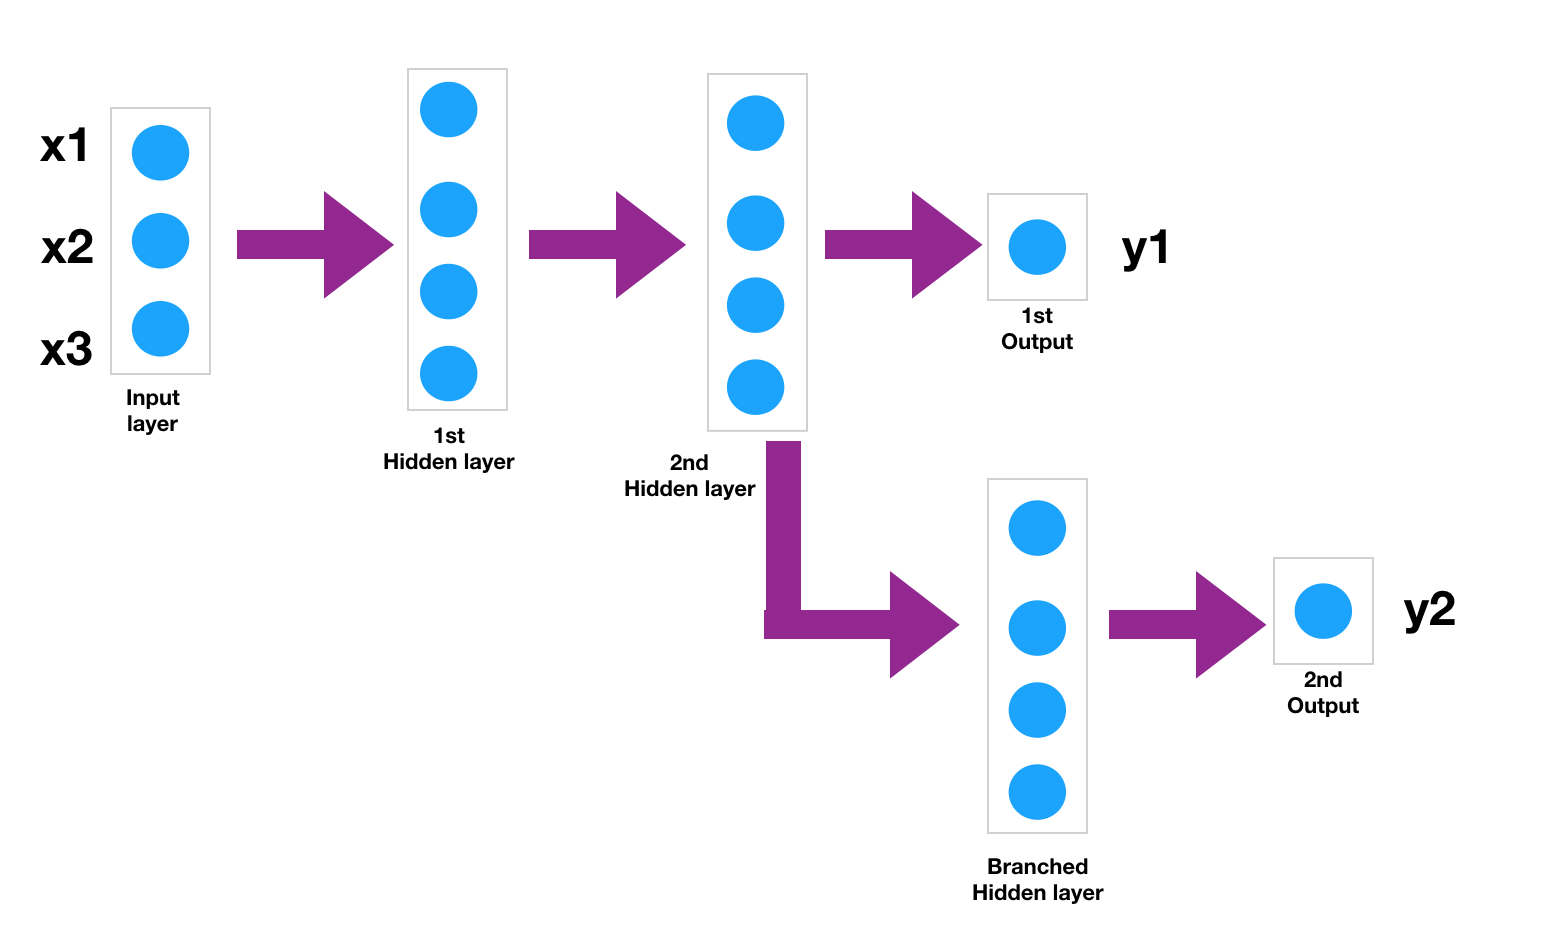

In [24]:
#Modelling
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense 

# Building
# Using 2 hidden layers and one branched layer with 10 neurons each
input_layer = Input(shape=(3,), name='input_layer')
Layer_1 = Dense(16, activation='relu', name='Layer_1')(input_layer)
Dropout = tf.keras.layers.Dropout(0.1)(Layer_1)
Layer_2 = Dense(12, activation='relu', name='Layer_2')(Layer_1)
y1_output = Dense(1, activation='linear', name='y1_output')(Layer_2)
Branched_layer = Dense(8, activation='relu', name='Branched_layer')(Layer_2)
y2_output = Dense(1, activation='linear', name='y2_output')(Branched_layer)
model = Model(inputs = input_layer, outputs = [y1_output, y2_output])
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_layer (InputLayer)       [(None, 3)]          0           []                               
                                                                                                  
 Layer_1 (Dense)                (None, 16)           64          ['input_layer[0][0]']            
                                                                                                  
 Layer_2 (Dense)                (None, 12)           204         ['Layer_1[0][0]']                
                                                                                                  
 Branched_layer (Dense)         (None, 8)            104         ['Layer_2[0][0]']                
                                                                                            

In [25]:
# Optimiser and Loss function
model.compile(optimizer='Nadam', loss={'y1_output':'mse','y2_output':'mse'})

model.fit(X_train, y_train, epochs=1000, batch_size=128, validation_data = (X_test,y_test))

Epoch 1/1000
60/60 [==============================] - 2s 6ms/step - loss: 209575.9062 - y1_output_loss: 206457.4844 - y2_output_loss: 3118.4019 - val_loss: 209485.2812 - val_y1_output_loss: 206454.1562 - val_y2_output_loss: 3031.1060
Epoch 2/1000
60/60 [==============================] - 0s 3ms/step - loss: 208517.2500 - y1_output_loss: 205485.9688 - y2_output_loss: 3031.3054 - val_loss: 207589.9219 - val_y1_output_loss: 204743.1719 - val_y2_output_loss: 2846.7615
Epoch 3/1000
60/60 [==============================] - 0s 3ms/step - loss: 205089.0156 - y1_output_loss: 202470.6094 - y2_output_loss: 2618.3667 - val_loss: 202191.1250 - val_y1_output_loss: 200060.6875 - val_y2_output_loss: 2130.4341
Epoch 4/1000
60/60 [==============================] - 0s 3ms/step - loss: 197371.2812 - y1_output_loss: 195818.3281 - y2_output_loss: 1552.9977 - val_loss: 192031.8281 - val_y1_output_loss: 191210.8906 - val_y2_output_loss: 820.9773
Epoch 5/1000
60/60 [==============================] - 0s 3ms/step

In [27]:
# Predictions
predictions = model.predict(X_test)
predicted_energy = predictions[0]
predicted_vaccum = predictions[1]

60/60 [==============================] - 0s 2ms/step


Text(0, 0.5, 'Predicted Energy Output')

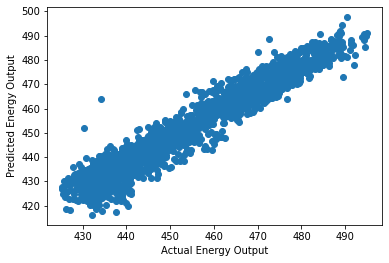

In [28]:
# Plots
plt.scatter(y_test[0], predicted_energy)
plt.xlabel('Actual Energy Output')
plt.ylabel('Predicted Energy Output')

Text(0, 0.5, 'Predicted Exhaust Vaccum')

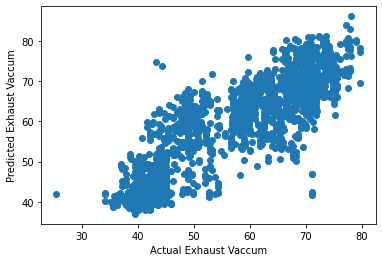

In [29]:
# Plots
plt.scatter(y_test[1], predicted_vaccum)
plt.xlabel('Actual Exhaust Vaccum')
plt.ylabel('Predicted Exhaust Vaccum')

In [30]:
from sklearn.metrics import r2_score
print('r2 score for energy predicted :',r2_score(y_test[0],predicted_energy))
print('r2 score forexhaust vacuum predicted :',r2_score(y_test[1],predicted_vaccum))

r2 score for energy predicted : 0.90057236561452
r2 score forexhaust vacuum predicted : 0.7547573134899298
